In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('tested.csv', usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,86
Fare,1


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Survived'].fillna(df['Survived'].mean(), inplace=True)
df.head()

<ipython-input-92-52dc1241bc28>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-92-52dc1241bc28>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [ ]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

<ipython-input-95-528e07dcccab>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


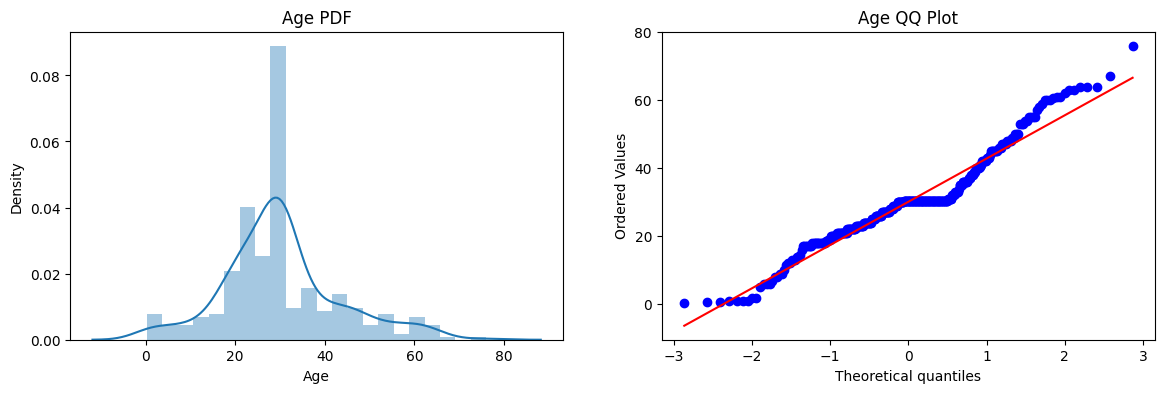

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist ="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

<ipython-input-96-9f5f3b76c804>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


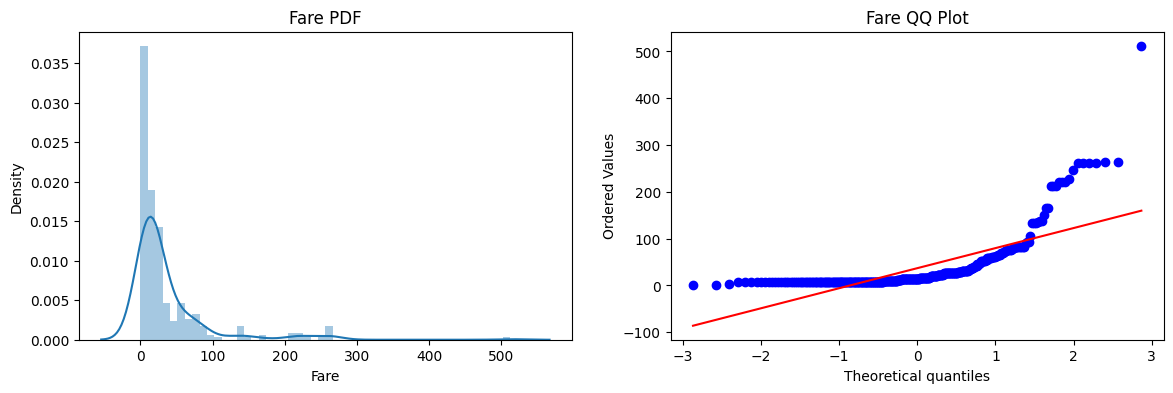

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist ="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [ ]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf1.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6071428571428571
Accuracy DT 0.6071428571428571


###Transformers


In [ ]:
trf = FunctionTransformer(func= np.log1p) #np.log zero ko leta aur error aata log main yeh np.log1p 1 add karta hai

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf1.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf.predict(X_test_transformed)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6190476190476191
Accuracy DT 0.6190476190476191


In [ ]:
##NOW CHECK KARO KI JO HUA HAI WO KAAM KA BHI HAIYA NI (VALIDATION CHECK!)
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed,y,scoring='accuracy', cv = 10)))
print("DT", np.mean(cross_val_score(clf1, X_transformed,y,scoring='accuracy', cv = 10)))

LR 0.6556329849012775
DT 0.5908826945412311


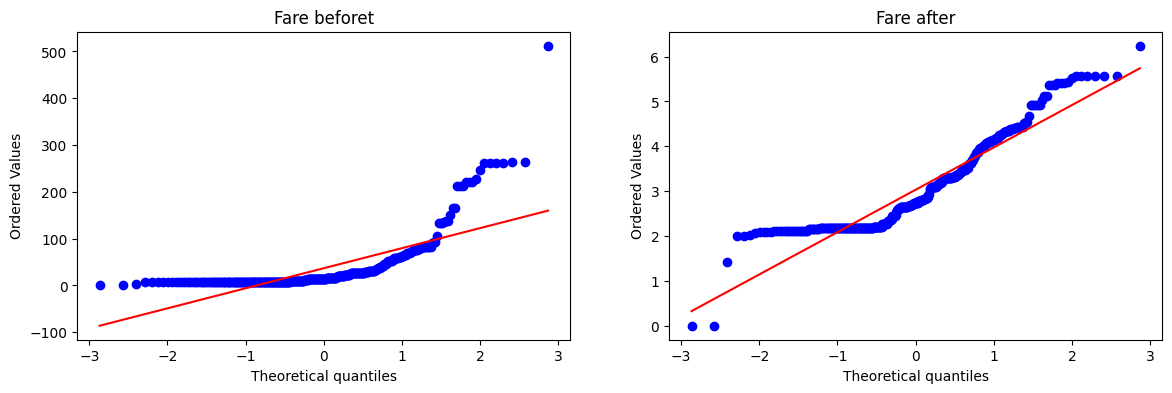

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist ="norm", plot=plt)
plt.title('Fare beforet')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist ="norm", plot=plt)
plt.title('Fare after')

plt.show()

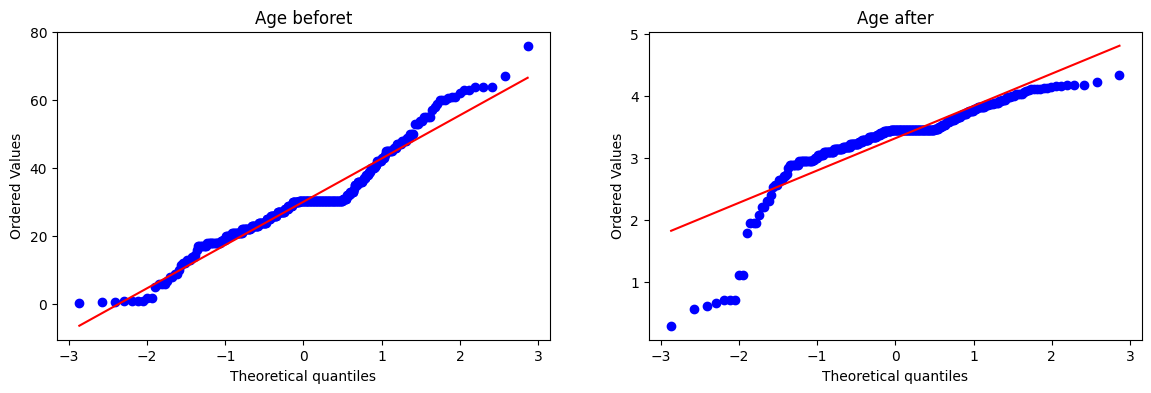

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist ="norm", plot=plt)
plt.title('Age beforet')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist ="norm", plot=plt)
plt.title('Age after')

plt.show()

###COLUMN TRANFORMER


In [ ]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p),['Fare'])], remainder = 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf1.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf.predict(X_test_transformed2)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6190476190476191
Accuracy DT 0.6190476190476191


In [ ]:
##NOW CHECK KARO KI JO HUA HAI WO KAAM KA BHI HAIYA NI (VALIDATION CHECK!)
X_transformed2 = trf.fit_transform(X)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed2,y,scoring='accuracy', cv = 10)))
print("DT", np.mean(cross_val_score(clf1, X_transformed2,y,scoring='accuracy', cv = 10)))

LR 0.6556329849012775
DT 0.5932636469221834


In [ ]:
def apply_transform(transform):
